<a href="https://colab.research.google.com/github/CeskKim/AI-Study/blob/main/model/prophet_coin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#######################################################
# pip install
#######################################################
!pip install pyupbit
!pip install pykrx
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 29.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#######################################################
# import set
#######################################################
import pyupbit
from pykrx import stock
from prophet import Prophet

In [6]:
#######################################################
# 소스 데이터
# 소스 : 업비트, 기준 : 시간, 기본 :200개
#######################################################
btc_upbit_df = pyupbit.get_ohlcv("KRW-BTC", interval = "minute60")
btc_upbit_df = btc_upbit_df.reset_index()
btc_upbit_df['ds'] = btc_upbit_df['index']
btc_upbit_df['y'] = btc_upbit_df['close']
btc_upbit_data = btc_upbit_df[['ds', 'y']]

In [7]:
#######################################################
# 학습 데이터
# 모델 : prophet
#######################################################
ph_model = Prophet()
ph_model.fit(btc_upbit_data)

#######################################################
# 예측
# 기준 : 24시간
#######################################################
ph_future = ph_model.make_future_dataframe(periods=24, freq='H')
ph_forecast = ph_model.predict(ph_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cs55yda/7yi0bjrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cs55yda/aicvz_0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3205', 'data', 'file=/tmp/tmp8cs55yda/7yi0bjrj.json', 'init=/tmp/tmp8cs55yda/aicvz_0r.json', 'output', 'file=/tmp/tmp8cs55yda/prophet_modely2tj9zgf/prophet_model-20230219133455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


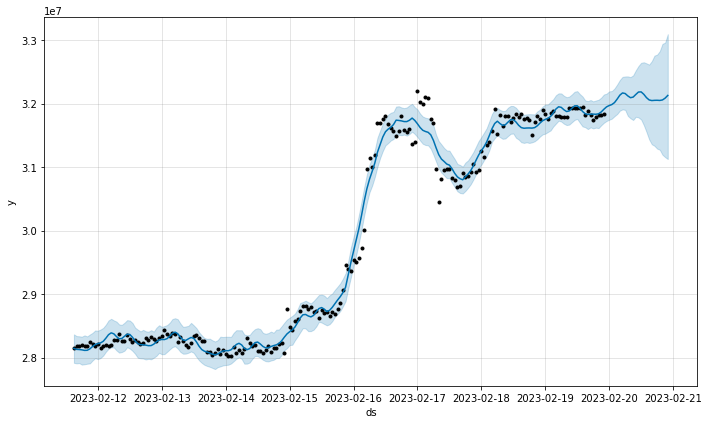

In [8]:
#######################################################
# 시각화
# 검은색점 : 실제 값, 파란색선 : 예측 값
#######################################################
ph_fig = ph_model.plot(ph_forecast)

In [10]:
#######################################################
# 튜닝
# 기본 : additive, multipleactive : 불규칙성 내역에 적용
# 참고 사이트 : https://study-by-security.tistory.com/17
#######################################################
ph_model = Prophet(
    seasonality_mode = "multiplicative",
    changepoint_prior_scale = 0.5,
    changepoint_range = 0.9
)
ph_model.fit(btc_upbit_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cs55yda/3dffvcyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cs55yda/cak0mgpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75920', 'data', 'file=/tmp/tmp8cs55yda/3dffvcyf.json', 'init=/tmp/tmp8cs55yda/cak0mgpw.json', 'output', 'file=/tmp/tmp8cs55yda/prophet_model9nv2k0y1/prophet_model-20230219133708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


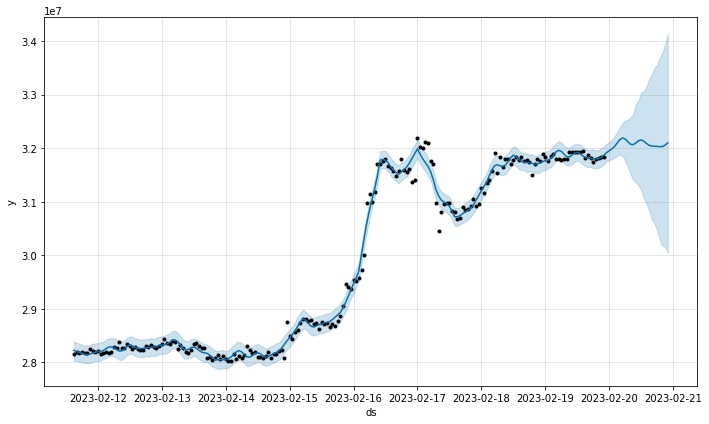

In [11]:
ph_future = ph_model.make_future_dataframe(periods=24, freq='H')
ph_forecast = ph_model.predict(ph_future)
ph_fig = ph_model.plot(ph_forecast)

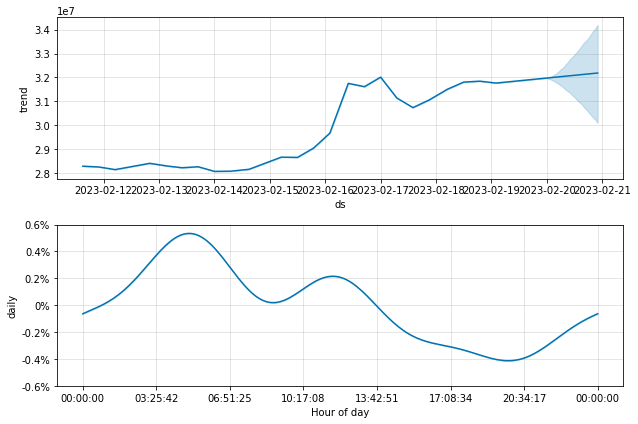

In [13]:
#######################################################
# 트렌드 예측값
#######################################################
ph_fig = ph_model.plot_components(ph_forecast)

In [17]:
#######################################################
# 현재가격, 24시간이후 예측 가격
#######################################################
btc_upbit_now = pyupbit.get_current_price("KRW-BTC")
btc_upbit_aft_24 = ph_forecast['yhat'].values[-1]
print(f"현재가격 : {btc_upbit_now}, 24시간 이후 가격 : {btc_upbit_aft_24}")

현재가격 : 31815000, 24시간 이후 가격 : 32099895.359192546
